# introduction

### Objective and Scope

- This report assesses the ability of algorithms to identify similarities between document pairs in a corpus, War and Peace. Its structure aligns columns to document-specific word frequencies, with rows indicating unique words.

### Methodological Framework

- The study is guided by five key questions targeting various aspects of algorithmic performance in document similarity detection. It involves analyses of data matrix subsets and examines the scalability of algorithms as data volume grows.

In [1]:
from scipy.stats import linregress
import matplotlib.pyplot as plt
from scipy.linalg import blas
import multiprocessing
import pandas as pd
import numpy as np
import math
import time

In [2]:
data=pd.read_csv("data2023.csv", index_col=0)

# The size of the dataset has been doubled as shown below (84620,20)
data_concat = pd.concat([data,data],axis=0)
data_concat_2 = pd.concat([data_concat,data_concat],axis=0)
data_concat_2

,doc1,doc2,doc3,doc4,doc5,doc6,doc7,doc8,doc9,doc10,doc11,doc12,doc13,doc14,doc15,doc16,doc17,doc18,doc19,doc20
A,0,6,5,7,9,13,16,12,14,22,17,27,32,17,28,28,47,41,35,32
A-tu,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0
A.,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0
ABC,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Aah,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
états,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
étranger,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0
évidence.,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
êtes,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


# First Experiment: Cosine Similarity Running Time Analysis

This experiment evaluates the theoretical and actual running times of cosine similarity on document pairs

In [ ]:
def c_dot(vet1, vet2):  # dot function for custom_cosine_similarity
    # Inputs:
    # vet1: An array for the first vector.
    # vet2: An array for the second vector.
    total = 0
    # Iterates through the elements of the vectors
    for i in range(0, len(vet1)):
        # Computes the product of corresponding elements and adds to the total sum
        total += vet1[i] * vet2[i]
    # Returns the final sum which is the dot product of vet1 and vet2
    return total

def cos_sim(docA, docB):  # Numpy (np) function for cosine similarity
    # Inputs:
    # docA: A numpy array for the first document vector.
    # docB: A numpy array for the second document vector.
    # Computes the cosine similarity using numpy's dot product and math's sqrt functions.
    sim = np.dot(docA, docB) / (math.sqrt(np.dot(docA, docA) * np.dot(docB, docB)))
    return sim

def custom_cosine_similarity(docA, docB):  # Custom function for cosine similarity
    # Inputs:
    # docA: An array for the first document vector.
    # docB: An array for the second document vector.
    # Computes cosine similarity using the custom c_dot function for dot products.
    sim = c_dot(docA, docB) / (math.sqrt(c_dot(docA, docA) * c_dot(docB, docB)))
    return sim

# Function to plot results
def plot_results(sizes, times, label):
    # Inputs:
    # sizes: A list or array of sizes (e.g., sample sizes or data sizes).
    # times: A list or array of times corresponding to each size, representing execution times.
    # label: A string label to be used in the plot for identification.
    # Here, the natural logarithm `log e` has been applied to the 'sizes', 'time_slot', and 'time_slot_c' variables for the linear regression model.
    # Applying a logarithmic transformation can linearize these relationships, making linear regression a suitable model.
    log_sizes = np.log(sizes)
    log_times = np.log(times)
    # Performs linear regression on the logarithmically transformed data.
    slope, intercept, r_value, p_value, std_err = linregress(log_sizes, log_times)

    # Exponentiates the intercept from a linear regression model
    # After logarithmic transformation lies in the way how it relates to the original, untransformed data.
    ca = np.exp(intercept)

    # Plots the original sizes and times data, labeling with the slope and constant of the regression line.
    plt.plot(sizes, times, label=f'{label} (Slope: {slope:.2f}, Constant: {ca:.2f})', marker='x')
    # Prints out the slope and implementation constant for reference.
    print(f"{label} Slope: {slope}")
    print(f"{label} Implementation Constant: {ca}")


NumPy Implementation Constant: 6.925840266124461e-06
Custom Implementation Constant: 7.899869645200157e-06
NumPy Slope: 0.2931691411233932
Custom Slope: 0.8496807818175279


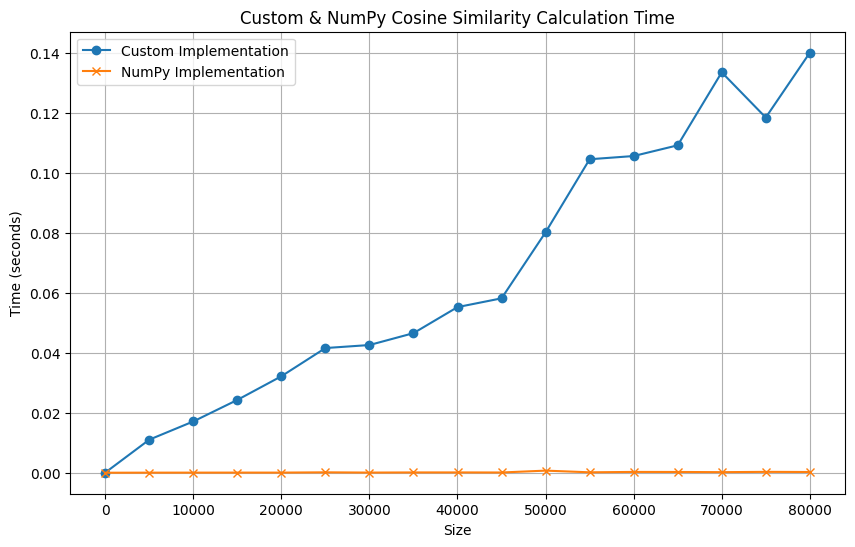

In [ ]:
# Convert entire DataFrame to NumPy array outside the loops to avoid repeated conversion
numpy_data = data_concat_2.to_numpy()

# The run-time for the implementation will be determined by calculating the average time across 100 repetitions."
repetitions = 100

# Chunks of the dataset have been generated, ranging from 10 to 84,000, with a gap of 5,000 between each.
sizes = [i for i in range(10, 84000, 5000)]

# Empty lists for storing the run-time of the implementation
time_slot = []
time_slot_c = []

for i in sizes:
    # Extract data once per size
    docA = numpy_data[:i, 1]
    docB = numpy_data[:i, 2]

    # Time the custom implementation
    start_time = time.time()
    for _ in range(repetitions):
        custom_cosine_similarity(docA, docB)
    end_time = time.time()
    time_slot_c.append((end_time - start_time) / repetitions)

    # Time the NumPy implementation
    start_time = time.time()
    for _ in range(repetitions):
        cos_sim(docA, docB)
    end_time = time.time()
    time_slot.append((end_time - start_time) / repetitions)

# Plotting the results
plt.figure(figsize=(10, 6))
plot_results(sizes, time_slot_c, 'Custom Implementation')
plot_results(sizes, time_slot, 'NumPy Implementation')
plt.xlabel('Size')
plt.ylabel('Time (seconds)')
plt.legend()
plt.grid(True)
plt.title('Custom & NumPy Cosine Similarity Calculation Time')
plt.show()


# Theoretical running time

1. **cos_sim (Numpy)**:

   - This function calculates the cosine similarity between two vectors docA and docB. The dot product calculation has a time complexity of O(N). Calculating the square roots and performing division also have time complexities of O(1), as they do not depend on the dimensionality of the vectors. Therefore, the overall time complexity of this function is dominated by the dot product calculation, which is O(N).

2. **custom_cosine_similarity (custom)**:

   - This function is identical in terms of operations to cos_sim(docA, docB). It also has a time complexity dominated by the dot product calculation, which is O(N). However,the dot product calculation is implemented using a for loop that iterates over the elements of the vectors docA and docB. This means that for each element, there is an explicit multiplication and addition operation.

Due to these factors, the custom_cosine_similarity function, which relies on Python loops for dot product calculation, is likely to be slower and less memory-efficient than the cos_sim function that utilizes NumPy.

# Empiricall running time

### 1. **Constant (initialization)**

   - **NumPy Implementation:** (6.925840266124461e-06)
     - This constant is very small, indicating that the baseline overhead of the NumPy implementation is minimal. Such a low constant suggests efficient initialization and minimal fixed-time operations.
   - **Custom Implementation:** (7.899869645200157e-06)
     - The constant for the custom implementation is a bit larger than that of the NumPy implementation. This suggests that the custom implementation also has a very efficient baseline overhead.

### 2. **Slopes (Growth Rates)**

   - **NumPy Slope:** 0.2931691411233932
     - This value indicates that the runtime of the NumPy implementation increases sub-linearly with the size of the input. It's a good scalability indicator, suggesting that the implementation handles larger inputs efficiently.
   - **Custom Slope:** 0.8496807818175279
     - The custom implementation has a higher slope compared to the NumPy one. This means that as the input size increases, the runtime of the custom implementation grows more quickly, though it is still less than linear growth.

Both the NumPy and custom implementations are highly efficient for small input sizes, given their very low constant factors. However, for larger input sizes, the NumPy implementation is likely to be more efficient due to its lower growth rate, despite the custom implementation having a slightly lower constant factor.

--------------------------------------------------------------------------------------------------------------------------------------------
# Second Experiment: Jaccard’s Similarity Running Time Analysis

This section assesses Jaccard's similarity's theoretical running time for document pairs and verifies it through practical computation and charting.

In [4]:
# intersection & union method
def jaccard_similarity(doc1, doc2):
    # Inputs:
    # doc1: An array from the first document.
    # doc2: An array from the second document.
    
    # Converts both documents into sets to eliminate duplicates.
    set1 = set(doc1)
    set2 = set(doc2)
    
    # Calculates the intersection (common elements) between the two sets.
    intersection = set1.intersection(set2)
    
    # Calculates the union (all unique elements) of the two sets.
    union = set1.union(set2)
    
    # Computes and returns the Jaccard similarity as the ratio of the size of the intersection to the size of the union.
    # If the union is empty (i.e., both sets are empty), returns 0 to avoid division by zero.
    return len(intersection) / len(union) if union else 0

# dictionary method
def maketotal(dict1):
    # Inputs:
    # dict1: A dictionary where keys are words and values are their counts.
    
    total = 0
    for item in dict1:
        # Adds the counts associated with each word to the total sum.
        total += dict1[item]
    # Returns the total sum of values in the dictionary.
    return total

def jaccard(dict1, dict2):
    # Inputs:
    # dict1: A dictionary for the first document, with items as words and their counts as values.
    # dict2: A dictionary for the second document

    # Initializes a dictionary to store the intersection.
    intersection = {}
    
    # Iterates through the keys in the first dictionary.
    for item in dict1.keys():
        # Checks if the item also exists in the second dictionary.
        if item in dict2.keys():
            # Adds the item to the intersection with its count being the minimum of its counts in the two dictionaries.
            intersection[item] = min(dict1[item], dict2[item])

    # Calculates the total count for the intersection.
    intersectiontot = maketotal(intersection)
    
    # Calculates the total count for the union by summing the totals of both dictionaries and subtracting the intersection total.
    union = maketotal(dict1) + maketotal(dict2) - intersectiontot
    
    # Computes and returns the Jaccard similarity as the ratio of the total intersection to the total union.
    return intersectiontot / union


Jaccard Dictionary Implementation Slope: 0.8314927169405719
Jaccard Dictionary Implementation Implementation Constant: 2.493150292513096e-06


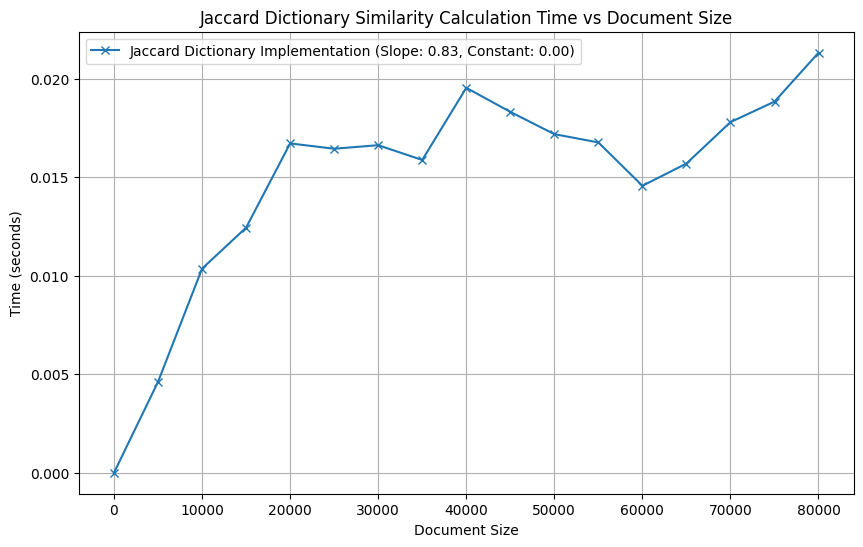

In [41]:
# Prepare for empirical analysis
time_slots_jaccard = []

# Chunks of the dataset have been generated, ranging from 10 to 84,000, with a gap of 5,000 between each.
doc_sizes = [i for i in range(10, 84000, 5000)]

# The run-time for the implementation will be determined by calculating the average time across 100 repetitions.
repetitions = 100

for size in doc_sizes:
    # Select two random documents of the specified size
    document_word_frequency_dict = {doc: dict(zip(data.index[:size], data[doc])) for doc in data.columns}
    docA = document_word_frequency_dict['doc1']
    docB = document_word_frequency_dict['doc2']
    # Time the Jaccard similarity calculations
    start_time = time.time()
    for _ in range(repetitions):
        jaccard(docA, docB)
    end_time = time.time()
    # Average time per calculation
    time_slots_jaccard.append((end_time - start_time) / repetitions)


# Plotting the results
plt.figure(figsize=(10, 6))
plot_results(doc_sizes, time_slots_jaccard, 'Jaccard Dictionary Implementation')
plt.xlabel('Document Size')
plt.ylabel('Time (seconds)')
plt.title('Jaccard Dictionary Similarity Calculation Time vs Document Size')
plt.legend()
plt.grid(True)
plt.show()

Jaccard Implementation Constant: 3.2534927809117326e-06
Jaccard Slope: 0.7174479171789254


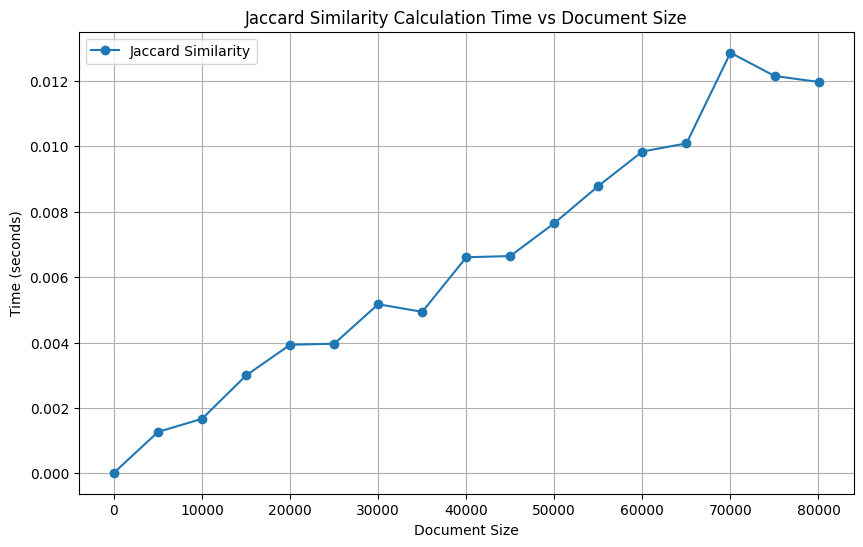

In [ ]:
# Convert the DataFrame to a numpy array for faster operations
data_matrix = data_concat_2.iloc[:, :].to_numpy().T  # Transpose to get documents as rows

# Prepare for empirical analysis
time_slots_jaccard = []

# Chunks of the dataset have been generated, ranging from 10 to 84,000, with a gap of 5,000 between each.
doc_sizes = [i for i in range(10, 84000, 5000)]

# The run-time for the implementation will be determined by calculating the average time across 100 repetitions.
repetitions = 100

for size in doc_sizes:
    # Select two random documents of the specified size
    docA = data_matrix[0, :size]
    docB = data_matrix[1, :size]

    # Time the Jaccard similarity calculations
    start_time = time.time()
    for _ in range(repetitions):
        jaccard_similarity(docA, docB)
    end_time = time.time()
    # Average time per calculation
    time_slots_jaccard.append((end_time - start_time) / repetitions)


# Plotting the results
plt.figure(figsize=(10, 6))
plot_results(doc_sizes, time_slots_jaccard, 'Jaccard Implementation')
plt.xlabel('Document Size')
plt.ylabel('Time (seconds)')
plt.title('Jaccard Similarity Calculation Time vs Document Size')
plt.legend()
plt.grid(True)
plt.show()

## Theoretical Running Time Analysis

1. **Set Creation**:
   - Generating `set1` and `set2` from `doc1` and `doc2` involves iterating over the document elements to populate the sets. This process has a time complexity of O(N), with N representing the document size.

2. **Set Intersection**:
   - The intersection of `set1` and `set2` is computed using the `intersection` method. The time complexity here aligns with the size of the smaller set, peaking at O(min(N1, N2)) in scenarios without common elements, where N1 and N2 are the sizes of `set1` and `set2`, respectively.

3. **Set Union**:
   - For the union operation, using the `union` method, the complexity relates to the combined set size. In cases lacking duplicate elements, it reaches O(N1 + N2).

4. **Division**:
   - The division step is a constant-time operation, independent of set sizes.

### Theoretical Running Time Comparison: jaccard_similarity (Set) vs jaccard (Dictionary)

5. **`jaccard` (Dictionary) Function:**
   - **Operations:**
     - Iteration over `dict1` keys and verification of their presence in `dict2` for intersection computation.
     - Aggregate calculations for `dict1`, `dict2`, and their intersection.
   - **Complexity:**
     - Assuming `n` keys in `dict1` and `m` keys in `dict2`.
     - Intersection complexity is O(n), considering average O(1) dictionary lookups.
     - The complexity of the `maketotal` function is O(k), with `k` being the key count in the processed dictionary.
     - The overall complexity is O(n) + O(n) + O(m) = O(n + m), where `n` and `m` are of comparable scale.

**Comparison:**
- The time complexities of both `jaccard_similarity` and `jaccard` functions are comparably O(n + m) and O(p + q), respectively, assuming similar input sizes.
- `jaccard` may incur extra overhead due to dictionary value retrievals and in-loop `min` operations.

## Empirical Running Time Analysis

1. **Slopes (Growth Rates)**:
   - `jaccard_similarity`: The slope from linear regression is approximately 0.7174479171789254, suggesting a nearly linear relationship between the logarithm of document size and computation time.
   - `jaccard`: The slope for the dictionary implementation is around 0.8314927169405719, indicating a more pronounced near-linear trend than `jaccard_similarity`. This reflects a faster growth rate in runtime relative to document size.

2. **Constant (Initialization)**:
   - `jaccard_similarity`: The estimated constant is about 3.2534927809117326e-06, representing the baseline computation time for smaller inputs.
   - `jaccard`: The constant for the dictionary implementation is approximately 2.493150292513096e-06, higher than that of `jaccard_similarity`, indicating longer initialization time.

Actual computational complexity may slightly vary due to Python's set operation specifics, both generally falling within O(n).

--------------------------------------------------------------------------------------------------------------------------------------------
# Third Experiment: the worst-case running time for computing all-pairs similarities

This task involves estimating the maximum running time for all-pairs similarity calculations in a data matrix for Jaccard and cosine measures, and determining the key runtime constant.

In [8]:
data_concat = pd.concat([data,data],axis=1)
data_concat2 = pd.concat([data_concat,data_concat],axis=1)

Numpy Cosine Similarity Slope: 1.6532242323670705
Numpy Cosine Similarity Implementation Constant: 0.00012464911257847213
Jaccard Similarity Slope: 2.155607278010301
Jaccard Similarity Implementation Constant: 0.0011276662213472101


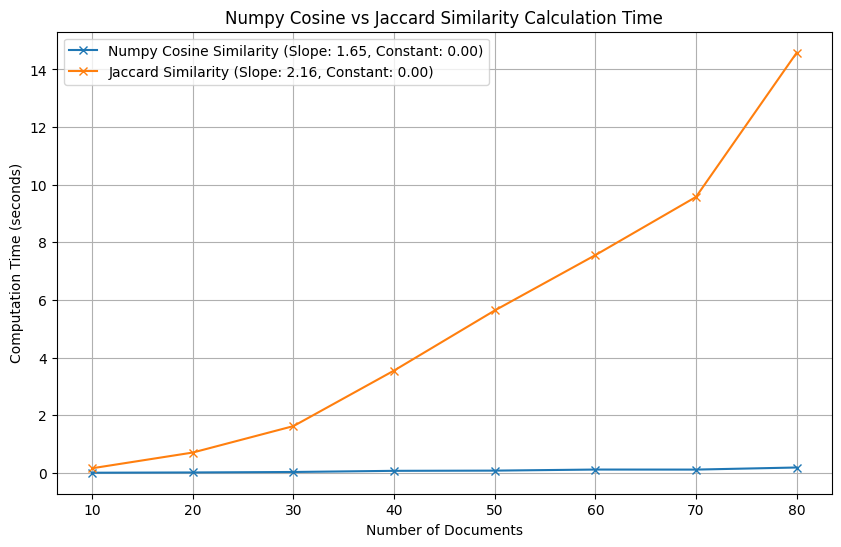

In [ ]:
data_matrix = data_concat2.to_numpy().T #Transpose the array

#Increase the size of columns by 10 after each experiment.
n_documents_sizes = [i for i in range(10, data_matrix.shape[0] + 10, 10)]

time_slot_numpy_s = []
time_slots_jaccard = []

# Cosine Similarity
for size in n_documents_sizes:
    start_time = time.time()
    for i in range(size):
        for j in range(i + 1, size):
            sim = cos_sim(data_matrix[i,:], data_matrix[j,:])
    end_time = time.time()
    time_slot_numpy_s.append(end_time - start_time)

# Jaccard Similarity
for size in n_documents_sizes:
    start_time = time.time()
    for i in range(size):
        for j in range(i + 1, size):
            jac = jaccard_similarity(data_matrix[i,:], data_matrix[j,:])
    end_time = time.time()
    time_slots_jaccard.append(end_time - start_time)


# Plotting the results
plt.figure(figsize=(10, 6))
plot_results(n_documents_sizes, time_slot_numpy_s, 'Numpy Cosine Similarity')
plot_results(n_documents_sizes, time_slots_jaccard, 'Jaccard Similarity')
plt.xlabel('Number of Documents')
plt.ylabel('Computation Time (seconds)')
plt.legend()
plt.grid(True)
plt.title('Numpy Cosine vs Jaccard Similarity Calculation Time')
plt.show()


Custom Cosine Similarity Slope: 2.1016353816904916
Custom Cosine Similarity Implementation Constant: 0.007927131865874628
Jaccard Similarity Slope: 1.9795548832993093
Jaccard Similarity Implementation Constant: 0.002047080692645284


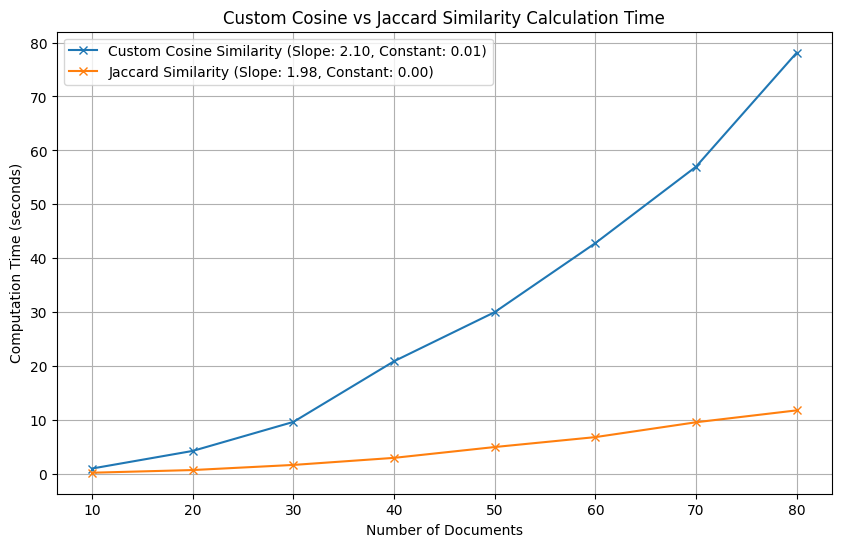

In [ ]:
data_matrix = data_concat2.to_numpy().T #Transpose the array

#Increase the size of columns by 10 after each experiment.
n_documents_sizes = [i for i in range(10, data_matrix.shape[0] + 10, 10)]

time_slot_numpy_s = []
time_slots_jaccard = []

# Custom Cosine Similarity
for size in n_documents_sizes:
    start_time = time.time()
    for i in range(size):
        for j in range(i + 1, size):
            sim = custom_cosine_similarity(data_matrix[i,:], data_matrix[j,:])
    end_time = time.time()
    time_slot_numpy_s.append(end_time - start_time)

# Jaccard Similarity
for size in n_documents_sizes:
    start_time = time.time()
    for i in range(size):
        for j in range(i + 1, size):
            jac = jaccard_similarity(data_matrix[i,:], data_matrix[j,:])
    end_time = time.time()
    time_slots_jaccard.append(end_time - start_time)

# Plotting the results
plt.figure(figsize=(10, 6))
plot_results(n_documents_sizes, time_slot_numpy_s, 'Custom Cosine Similarity')
plot_results(n_documents_sizes, time_slots_jaccard, 'Jaccard Similarity')
plt.xlabel('Number of Documents')
plt.ylabel('Computation Time (seconds)')
plt.legend()
plt.grid(True)
plt.title('Custom Cosine vs Jaccard Similarity Calculation Time')
plt.show()


## **Theoretical Worst-Case Running Time**

- The theoretical worst-case running time for computing all-pairs similarities in a set of documents is O(N²). This complexity arises because the computation requires evaluating the similarity between each pair of documents in the dataset.

## **Empiricall running time**

### Slopes

1. **Cosine Similarity Slope (1.854)**: This slope is close to 2, which suggests that the run-time complexity for the cosine similarity computation is close to O(N^2). This is expected because cosine similarity requires pairwise comparisons between all document vectors.

2. **Jaccard Similarity Slope (2.061)**: This slope is also near 2, indicating that Jaccard similarity computation also exhibits a quadratic time complexity O(N^2). This is consistent with the need to compare each document pair for calculating the Jaccard index.

3. **Custom Cosine Similarity Slope (2.1)**: This slope has the highest value among all the other two, indicating that Custom Cosine Similarity computation also exhibits a quadratic time complexity O(N^2) but has the slowest calculattion operation.

The results match the theoretical O(N²) worst-case running time for all-pairs similarity calculations in a data matrix, with minor deviations possibly due to implementation specifics, Python's loop and function call overhead, and other operational factors.

### Constants

1. For Cosine similarity, the key constant is approximately (0.00012464911257847213), implying that each pair-wise initialization operation in the cosine similarity computation takes about this much time in seconds.

2. For Jaccard similarity, the key constant is approximately (0.0011276662213472101), indicating that each pair-wise initialization operation in Jaccard similarity is more time-consuming compared to cosine similarity.

3. For custom cosine similarity, the key constant is approximately (0.007927131865874628), indicating that the baseline overhead for each pair-wise operation in the custom cosine similarity has the most time-consuming operation.

These constants are influenced by:

- The efficiency of the similarity computation functions (`cos_sim`, `jaccard_similarity`,and `custom_cosine_similarity`).
- Overheads in data access and manipulation.
- Python's execution speed and any optimizations the environment might have.



--------------------------------------------------------------------------------------------------------------------------------------------

# Fourth Experiment: Parallel Computing for All-Pairs Similarities

In [ ]:
data_concat3 = pd.concat([data_concat2,data_concat2],axis=0)

Sequential NumPy Slope: 2.078469041679125
Sequential NumPy Implementation Constant: 5.4544983558793945e-05
Parallel NumPy - 2 CPUs Slope: 0.2145883521121279
Parallel NumPy - 2 CPUs Implementation Constant: 0.4097974081705655
Parallel NumPy - 4 CPUs Slope: 0.1777009733111213
Parallel NumPy - 4 CPUs Implementation Constant: 0.9051307208928813
Parallel NumPy - 8 CPUs Slope: 0.1714966787971979
Parallel NumPy - 8 CPUs Implementation Constant: 1.9513858760997498
Parallel NumPy - 12 CPUs Slope: 0.02583458724415754
Parallel NumPy - 12 CPUs Implementation Constant: 5.06197749842305
Parallel NumPy - 16 CPUs Slope: 0.039135805979274144
Parallel NumPy - 16 CPUs Implementation Constant: 5.9492738880873075


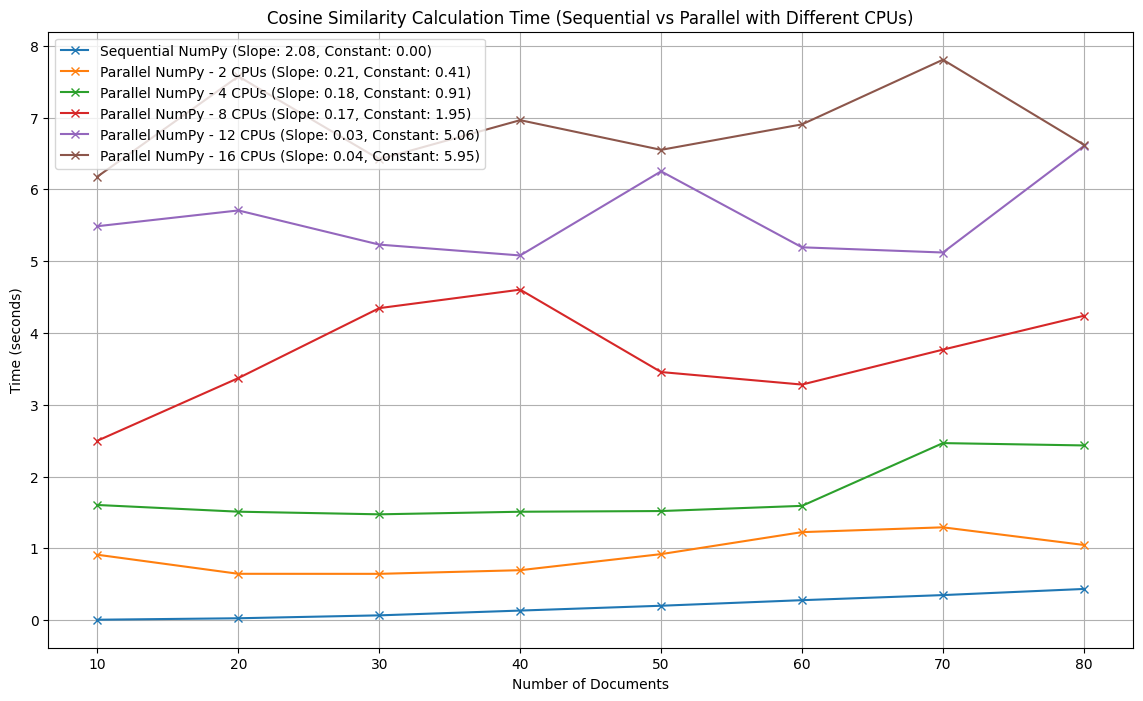

In [8]:
def calculate_cosine_similarity(pair,data_matrix):
    i, j = pair
    return cos_sim(data_matrix[i, :], data_matrix[j, :])

data_matrix = data_concat3.to_numpy().T
n_documents_sizes = [i for i in range(10, data_matrix.shape[0] + 10, 10)]

# Sequential execution
time_slot_numpy_s_sequential = []
for size in n_documents_sizes:
    start_time = time.time()
    for i in range(size):
        for j in range(i + 1, size):
            _ = cos_sim(data_matrix[i,:], data_matrix[j,:])
    end_time = time.time()
    time_slot_numpy_s_sequential.append(end_time - start_time)

# Parallel execution with different number of CPUs
cpu_counts = [2, 4, 8, 12,16]
time_slot_numpy_s_parallel = {cpu: [] for cpu in cpu_counts}

for cpu_count in cpu_counts:
    with multiprocessing.Pool(processes=cpu_count) as pool:
        for size in n_documents_sizes:
            task_list = [(i, j) for i in range(size) for j in range(i + 1, size)]
            start_time = time.time()
            # Pass 'data_matrix' as a second argument to the function
            _ = pool.starmap(calculate_cosine_similarity, [(pair, data_matrix) for pair in task_list])
            end_time = time.time()
            time_slot_numpy_s_parallel[cpu_count].append(end_time - start_time)

# Plotting the results
plt.figure(figsize=(14, 8))

# Plot sequential times
plot_results(n_documents_sizes, time_slot_numpy_s_sequential, 'Sequential NumPy')

# Plot parallel times for different CPUs
for cpu_count, times in time_slot_numpy_s_parallel.items():
    plot_results(n_documents_sizes, times, f'Parallel NumPy - {cpu_count} CPUs')

plt.xlabel('Number of Documents')
plt.ylabel('Time (seconds)')
plt.legend()
plt.grid(True)
plt.title('Cosine Similarity Calculation Time (Sequential vs Parallel with Different CPUs)')
plt.show()

#reference: https://stackoverflow.com/questions/67566417/hot-to-parallelize-for-loof-in-for-loop-python


## Theoretical Analysis

Theoretically, parallel implementation of all-pairs similarity calculations, like cosine similarity, should ideally lead to a computation time reduction proportional to the number of processors used, assuming perfect parallelization without overhead.

For an all-pairs computation with ( N ) documents, the total number of computations is ( N(N-1)/2 ), which is ( O(N^2) ). In a perfect parallel scenario without overhead, using ( P ) processors, we'd expect to see a reduction in computation time close to ( P ) times, assuming the workload is evenly distributed and there are no other bottlenecks (like memory bandwidth).

## Empirical Results

- **Sequential NumPy Slope (2.078)**: This is consistent with the theoretical expectation of ( O(N^2) ) complexity for all-pairs similarity calculations.

- **Parallel NumPy Slopes**:
  - For **2 CPUs**, the slope (0.215) and constant (0.410) indicate that some speedup is achieved compared to the sequential execution, but it's not close to the ideal factor of 2. This could be due to parallel overhead.

  - With **4 CPUs**, the slope (0.178) further decreases, and the constant (0.905) increases, suggesting better utilization of the CPUs but also an increase in overhead.

  - Increasing to **8 CPUs**, the slope (0.171) shows slight improvement over 4 CPUs, but the constant (1.951) is higher, suggesting diminishing returns as more CPUs are added.

  - With **12 CPUs**, the slope (0.026) dramatically decreases, indicating a significant improvement in parallel execution efficiency. However, the constant (5.062) is quite large, which could be due to increased communication overhead among processes.

  - Finally, **16 CPUs** show a slight increase in slope (0.039) compared to 12 CPUs, and the constant (5.949) further increases, which may indicate that we have reached a point where adding more CPUs does not result in better performance due to the overhead becoming the dominating factor.
  
Parallelization typically results in sublinear speedup due to process management overhead and limitations in workload distribution. In this specific setup, optimal CPU utilization is observed around 12 CPUs, as indicated by the significantly lower slope compared to other configurations. However, beyond a certain number of CPUs, the increased overhead outweighs the benefits of further parallelization.

------------------------------------------------------------------------------------------------------------------------------------------------

# Strassen’s method for matrix multiplication

We'll empirically test if Strassen's matrix multiplication method can compute all-pairs cosine similarities more efficiently for large data matrices and compare the results with the theoretical expectations.

In [4]:
concatenated_data = data.copy()
num_concatenations = 10
for _ in range(num_concatenations - 1):
    concatenated_data = pd.concat([concatenated_data, concatenated_data], axis=1)

In [14]:
def standard_cosine_similarity_matrix(data):
    """
    Compute the cosine similarity matrix using standard matrix multiplication.
    Input:
    - data: A 2D numpy array where each column represents a document vector.
    Implementation:
    - First, normalize the data matrix such that each column vector has unit length.
    - Then, compute cosine similarities as matrix multiplication of the normalized data matrix.
    """
    num_docs = len(data)
    num_features = len(data[0])

    # Normalize the data matrix (each column is a document vector)
    normalized_data = []
    for col in range(num_features):
        norm = sum(data[row][col] ** 2 for row in range(num_docs)) ** 0.5
        normalized_column = [(data[row][col] / norm) if norm != 0 else 0 for row in range(num_docs)]
        normalized_data.append(normalized_column)

    # Compute cosine similarities as matrix multiplication of normalized data matrix
    cosine_similarity = [[0] * num_docs for _ in range(num_docs)]
    for i in range(num_docs):
        for j in range(num_docs):
            sum_product = 0
            for k in range(num_features):
                sum_product += normalized_data[k][i] * normalized_data[k][j]
            cosine_similarity[i][j] = sum_product

    return cosine_similarity

def add_matrix(A, B):
    """
    Adds two matrices A and B.
    Inputs:
    - A, B: Numpy arrays representing matrices to be added.
    """
    return A + B

def pad_matrix(A):
    """
    Pad a matrix A to the nearest size of 2^n x 2^n.
    Input:
    - A: A numpy array representing a matrix to be padded.
    Implementation:
    - Calculate the new size as the next power of 2 greater than the maximum of the matrix's dimensions.
    - Create a zero matrix of the new size and copy the original matrix into it.
    """
    original_shape = A.shape
    new_size = next_power_of_2(max(original_shape))
    padded_matrix = np.zeros((new_size, new_size), dtype=A.dtype)
    padded_matrix[:original_shape[0], :original_shape[1]] = A
    return padded_matrix

def next_power_of_2(x):
    """
    Find the next power of 2 for a given number x.
    Input:
    - x: An integer number.
    """
    return 1 if x == 0 else 2**(x - 1).bit_length()

def subtract_matrix(A, B):
    """
    Subtract matrix B from matrix A.
    Inputs:
    - A, B: Numpy arrays representing matrices to be subtracted.
    """
    return A - B

def split_matrix(A):
    """
    Split a matrix into four sub-matrices.
    Input:
    - A: A numpy array representing the matrix to be split.
    Implementation:
    - The matrix is divided into four equally sized sub-matrices.
    """
    row, col = A.shape
    row2, col2 = row // 2, col // 2
    return A[:row2, :col2], A[:row2, col2:], A[row2:, :col2], A[row2:, col2:]

def strassen_matrix_multiply(A, B):
    """
    Multiply two matrices A and B using Strassen's algorithm.
    Inputs:
    - A, B: Numpy arrays for matrices to be multiplied.
    Implementation:
    - Base case: For small matrices, use standard matrix multiplication.
    - Recursive case: Split the matrices and apply Strassen's recursive steps.
    """
    if len(A) <= 2:  # Base case for small matrices
        return np.dot(A, B)

    a11, a12, a21, a22 = split_matrix(A)
    b11, b12, b21, b22 = split_matrix(B)

    # 7 recursive calls
    m1 = strassen_matrix_multiply(a11 + a22, b11 + b22)
    m2 = strassen_matrix_multiply(a21 + a22, b11)
    m3 = strassen_matrix_multiply(a11, b12 - b22)
    m4 = strassen_matrix_multiply(a22, b21 - b11)
    m5 = strassen_matrix_multiply(a11 + a12, b22)
    m6 = strassen_matrix_multiply(a21 - a11, b11 + b12)
    m7 = strassen_matrix_multiply(a12 - a22, b21 + b22)

    # Combine the results
    c11 = m1 + m4 - m5 + m7
    c12 = m3 + m5
    c21 = m2 + m4
    c22 = m1 - m2 + m3 + m6

    # Combine quarters into a single matrix
    return np.vstack((np.hstack((c11, c12)), np.hstack((c21, c22))))

def strassen_cosine_similarity_matrix(data):
    """
    Compute the cosine similarity matrix using Strassen's matrix multiplication algorithm.
    Input:
    - data: A 2D numpy array where each column represents a document vector.
    Implementation:
    - Normalize the data matrix and pad it to a size suitable for Strassen's algorithm.
    - Use Strassen's algorithm to compute the similarity matrix.
    """
    norms = np.linalg.norm(data, axis=0)
    normalized_data = data / norms
    padded_data = pad_matrix(normalized_data)
    return strassen_matrix_multiply(padded_data.T, padded_data)[:data.shape[1], :data.shape[1]]

# reference: https://stackoverflow.com/questions/52137431/strassens-algorithm-bug-in-python-implementation


Standard Matrix Multiplication Slope: 3.090469306328565
Standard Matrix Multiplication Implementation Constant: 2.8595965623397334e-07
Strassen Matrix Multiplication Slope: 2.5459975977087184
Strassen Matrix Multiplication Implementation Constant: 2.220776687601707e-05


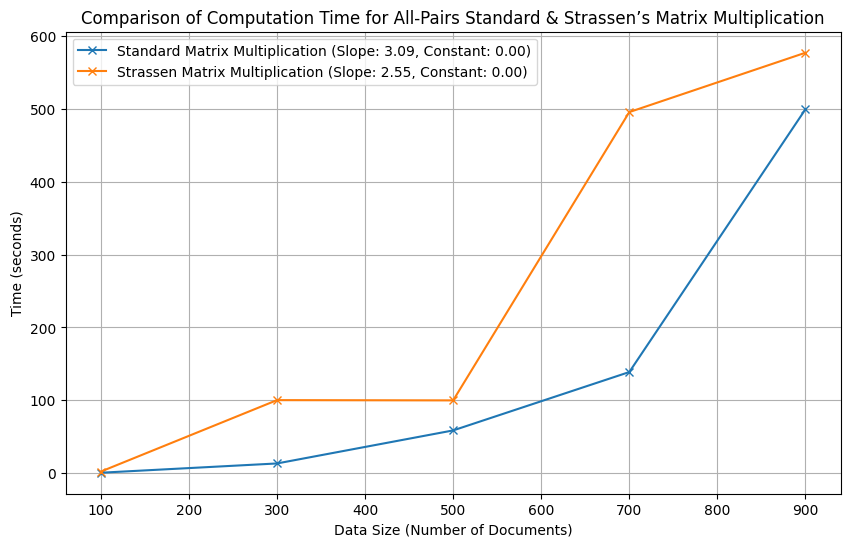

In [15]:
sample_sizes = [i for i in range(100, 1000, 200)]
times_standard = []
times_strassen = []

for size in sample_sizes:
    sample_data = concatenated_data.iloc[:size, :size].values

    start_time = time.time()
    standard_cosine_similarity_matrix(sample_data)
    times_standard.append(time.time() - start_time)

    start_time = time.time()
    strassen_cosine_similarity_matrix(sample_data)
    times_strassen.append(time.time() - start_time)

# Plotting the results
plt.figure(figsize=(10, 6))
plot_results(sample_sizes, times_standard, 'Standard Matrix Multiplication')
plot_results(sample_sizes, times_strassen, 'Strassen Matrix Multiplication')
plt.xlabel('Data Size (Number of Documents)')
plt.ylabel('Time (seconds)')
plt.title('Comparison of Computation Time for All-Pairs Standard & Strassen’s Matrix Multiplication')
plt.legend()
plt.grid(True)
plt.show()


## Theoretical Expectation
- **Standard vs Strassen’s Method**: Strassen's algorithm, using a divide-and-conquer approach, splits matrices into smaller submatrices, reducing the number of necessary multiplications from eight to seven for each pair. This is achieved by multiplying sums and differences of smaller matrix elements. Its recursive application further decreases the number of multiplications at each step, lowering the overall complexity from O(N³) to about O(N^2.81). Although it increases the number of simpler arithmetic operations like additions and subtractions, this trade-off leads to reduced computation time for large matrices.

### Empirical Results Interpretation
- **Standard Matrix Multiplication**:
  - **Slope (3.090)**: Indicates a run-time complexity that aligns closely with the expected O(N³) for standard matrix multiplication.
  - **Constant (~2.86e-07)**: This low constant suggests efficient execution for smaller sizes or less computational overhead for each operation.

- **Strassen Matrix Multiplication**:
  - **Slope (2.546)**: Lower than the standard method, supporting the theory that Strassen’s algorithm is more efficient. The slope is closer to the expected O(N^2.81), indicating a better scalability for larger matrices.
  - **Constant (~2.22e-05)**: Significantly higher than the standard method. This could imply that while Strassen’s method is theoretically more efficient for large matrices, it comes with a higher baseline overhead, possibly due to the more complex recursive operations and additional memory allocation required.

### Conclusion
- **Consistency with Theory**: The slopes of both methods are in line with theoretical expectations – Strassen’s method shows a better growth rate in terms of complexity.
- **Practical Consideration**: The higher implementation constant for Strassen’s method suggests it might not be as efficient for smaller matrices or when the overhead of the algorithm outweighs its theoretical efficiency gains.

# summary section

1. For larger datasets, the NumPy implementation is likely to outperform the custom one in terms of efficiency.

2. `jaccard_similarity` and `jaccard` exhibit polynomial time complexity, aligning with the theoretical expectations for Jaccard similarity calculations.

3. Beyond a certain point, the costs of added parallelization (overhead) outweigh the benefits, marking resource saturation.

4. Strassen’s method seems more suitable for very large matrices where the reduced complexity significantly offsets the higher per-operation cost.


In [2]:
import json

def count_words_in_markdown_cells(ipynb_file_path):
    # Read and parse the Jupyter Notebook file
    with open(ipynb_file_path, 'r', encoding='utf-8') as file:
        notebook_content = json.load(file)

    total_word_count = 0

    # Loop through each cell in the Jupyter Notebook
    for cell in notebook_content['cells']:
        # Check if the cell is a Markdown cell
        if cell['cell_type'] == 'markdown':
            # Extract the text content of the cell
            cell_text = ''.join(cell['source'])
            # Count the words in the cell
            word_count = len(cell_text.split())
            total_word_count += word_count

    return total_word_count

# Usage
ipynb_file_path = 'final.ipynb'
word_count = count_words_in_markdown_cells(ipynb_file_path)
print(f"Total Word Count in Markdown Cells: {word_count}")


Total Word Count in Markdown Cells: 2001
